#### Time Series Analysis and Forecasting with Python

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. 

In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly.

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

In [3]:
shampoo = pd.read_csv("C:\\Users\\user\\Documents\\Data Science Files\\Jupyter notebooks for Data Science\\Shampoo.csv")

In [4]:
shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [5]:
type(shampoo)

pandas.core.frame.DataFrame

In [6]:
# Importing the csv file as a time series dataset
shampoo = pd.read_csv("C:\\Users\\user\\Documents\\Data Science Files\\Jupyter notebooks for Data Science\\Shampoo.csv", index_col = [0], parse_dates = True, squeeze = True)

C:\Users\user\AppData\Local\Temp\ipykernel_22484\1326697965.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  shampoo = pd.read_csv("C:\\Users\\user\\Documents\\Data Science Files\\Jupyter notebooks for Data Science\\Shampoo.csv", index_col = [0], parse_dates = True, squeeze = True)


In [7]:
#To check that it has been converted to time series
type(shampoo) 

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

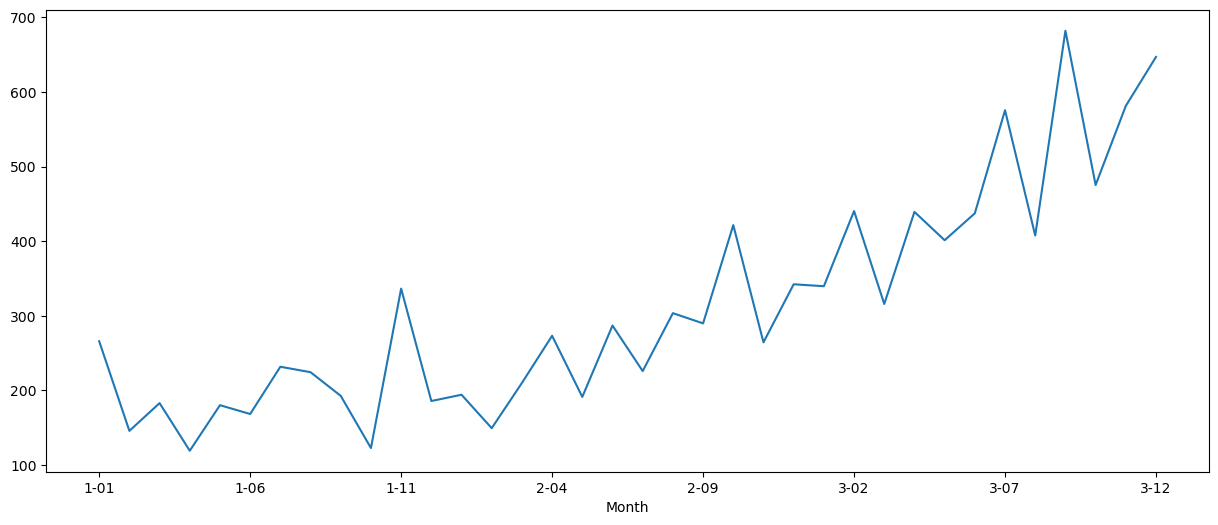

In [8]:
#Ploting the time series graph
shampoo.plot()

<AxesSubplot:xlabel='Month'>

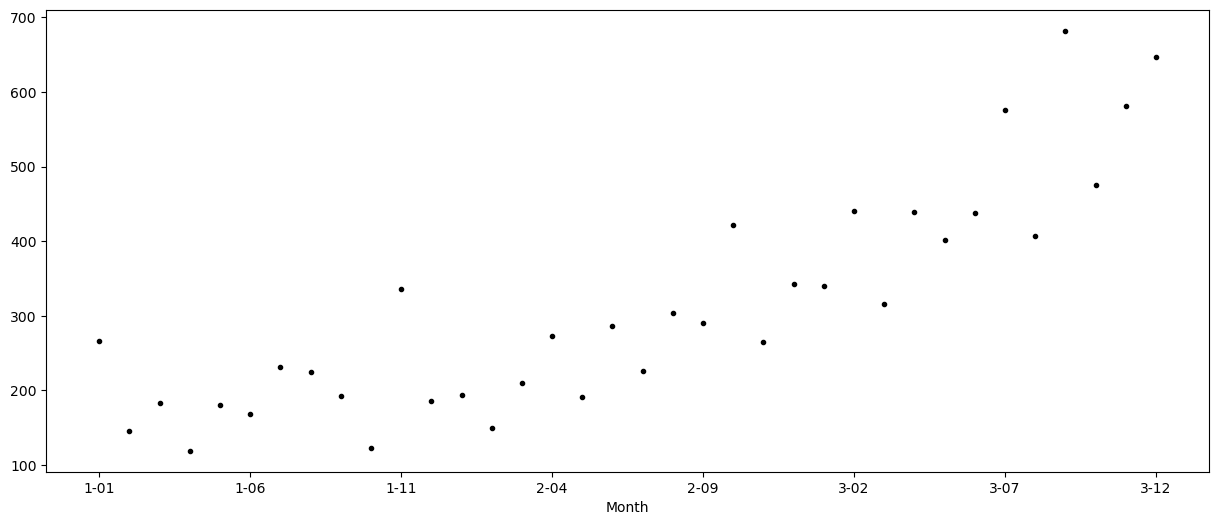

In [9]:
#To change the style to dots and not line
shampoo.plot(style = 'k.')

In [10]:
#To know how many data points
shampoo.size #property is used without ()

36

In [11]:
#To get more details about the dataset
shampoo.describe() #method is used with()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

Mean = Taking the sum and dividing by count of the value
Median = Middle value in an ordered list
Mode = The most repeated value

In [12]:
#Smoothing of time series - this is done by calculating the moving average
shampoo_ma = shampoo.rolling(window = 10).mean()

<AxesSubplot:xlabel='Month'>

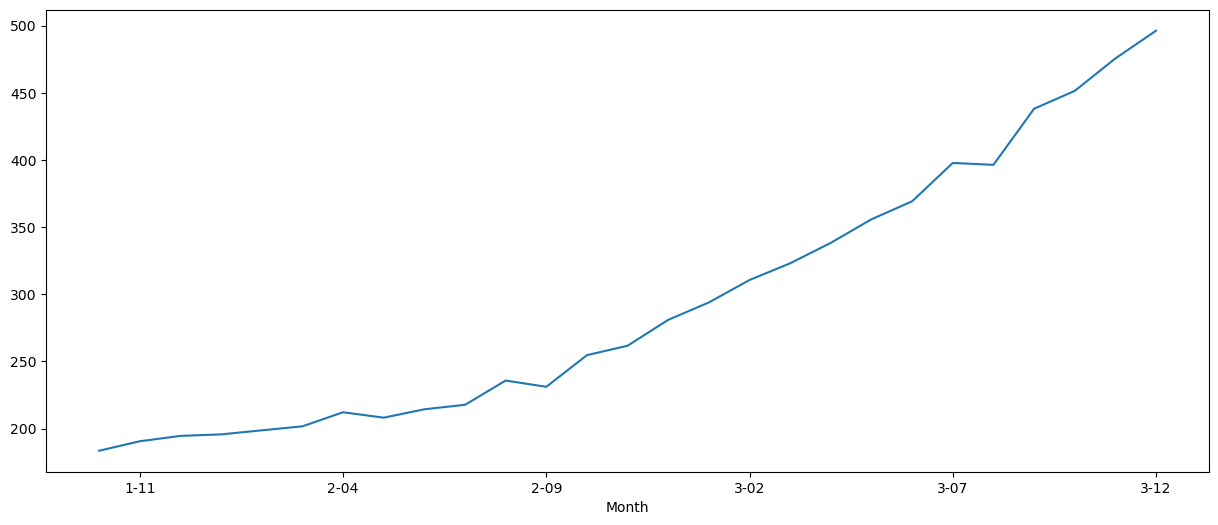

In [13]:
shampoo_ma.plot() 

In [14]:
#Creating a baseline model - The previous value is the best reflector of the next value
shampoo

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
1-06    168.5
1-07    231.8
1-08    224.5
1-09    192.8
1-10    122.9
1-11    336.5
1-12    185.9
2-01    194.3
2-02    149.5
2-03    210.1
2-04    273.3
2-05    191.4
2-06    287.0
2-07    226.0
2-08    303.6
2-09    289.9
2-10    421.6
2-11    264.5
2-12    342.3
3-01    339.7
3-02    440.4
3-03    315.9
3-04    439.3
3-05    401.3
3-06    437.4
3-07    575.5
3-08    407.6
3-09    682.0
3-10    475.3
3-11    581.3
3-12    646.9
Name: Sales, dtype: float64

In [15]:
#Creating the Naive model. This is done using the shift method
# This is done by shifting the data point one point down
shampoo_base = pd.concat([shampoo, shampoo.shift(1)], axis = 1)

In [16]:
shampoo_base

,Sales,Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5


In [17]:
#Renaming the columns
shampoo_base.columns = ['Actual_Sales', 'Forecast_Sales']

In [18]:
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [19]:
#Dropping the missing values
shampoo_base.dropna()

,Actual_Sales,Forecast_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5
1-10,122.9,192.8


In [20]:
#Checking the dataset, we see that the missing value is still present
shampoo_base

,Actual_Sales,Forecast_Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5


In [21]:
#To make sure the changes are saved permanently use inplace
shampoo_base.dropna(inplace = True)

In [22]:
shampoo_base

,Actual_Sales,Forecast_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5
1-10,122.9,192.8


In [23]:
#Calculating the error between the actual and forecast 
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
shampoo_error = mean_squared_error(shampoo_base.Actual_Sales, shampoo_base.Forecast_Sales)

In [25]:
shampoo_error

11715.388285714285

In [26]:
np.sqrt(shampoo_error)

108.23764726616282

In [27]:
#ARIMA Method - Auto-Regressive Moving Average Method
#PACF - To evaluate the parameter for P(auto-regressive) and ACF(for moving average)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

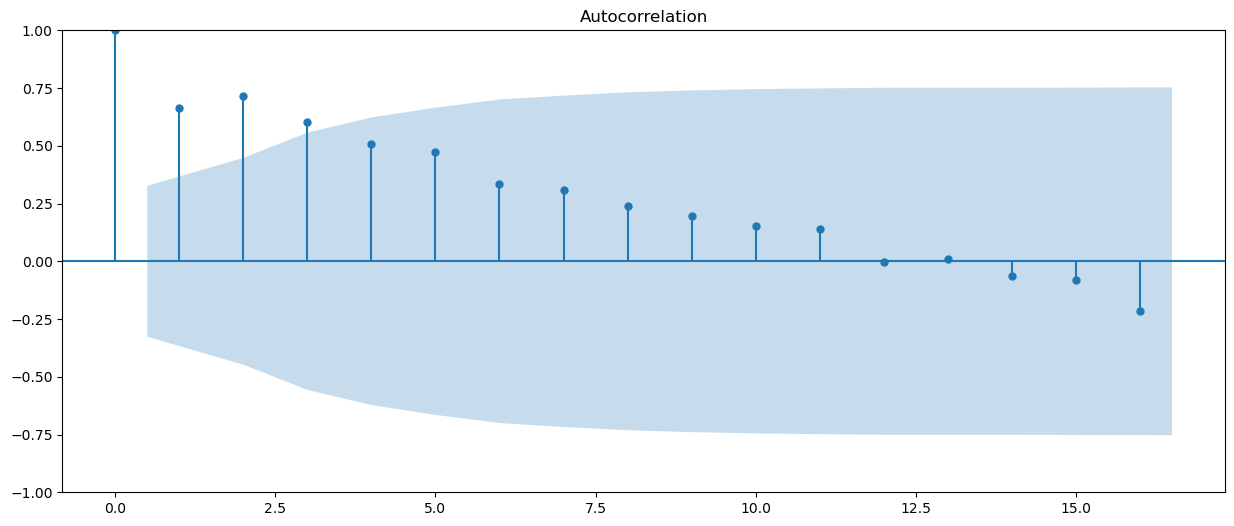

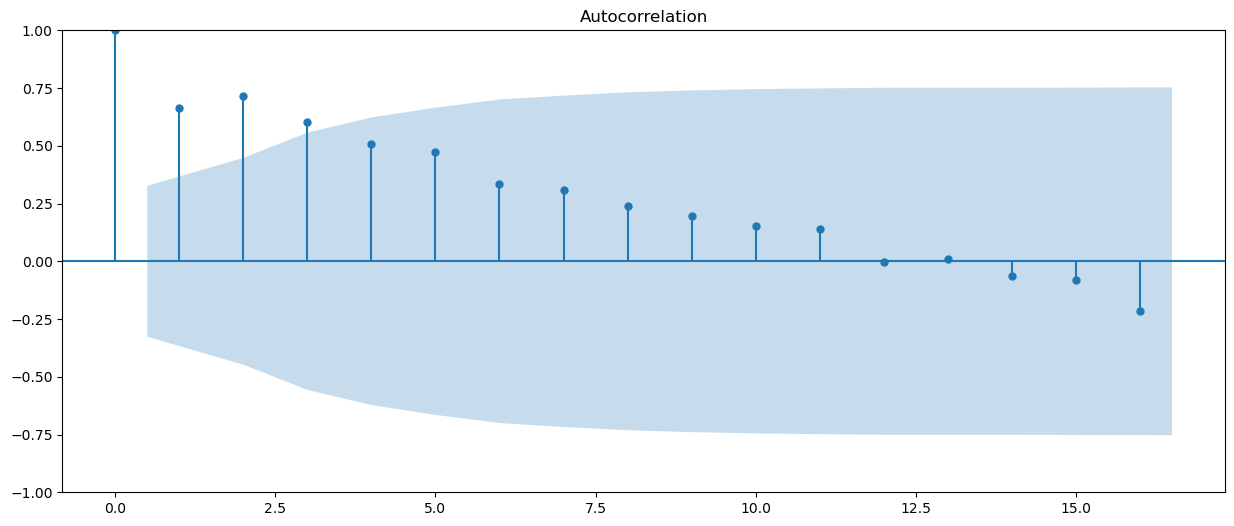

In [28]:
plot_acf(shampoo)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


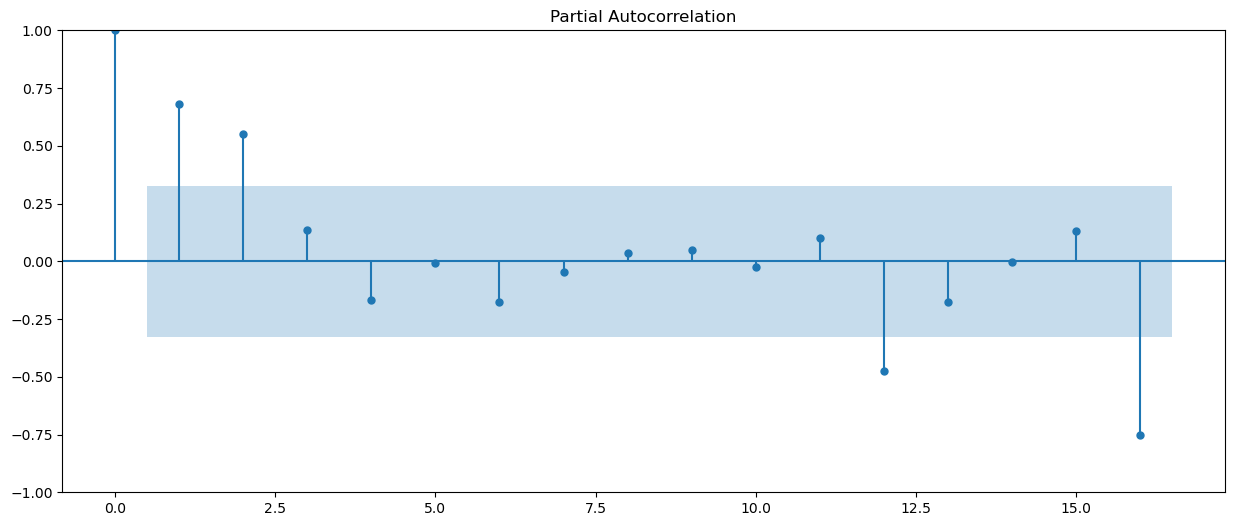

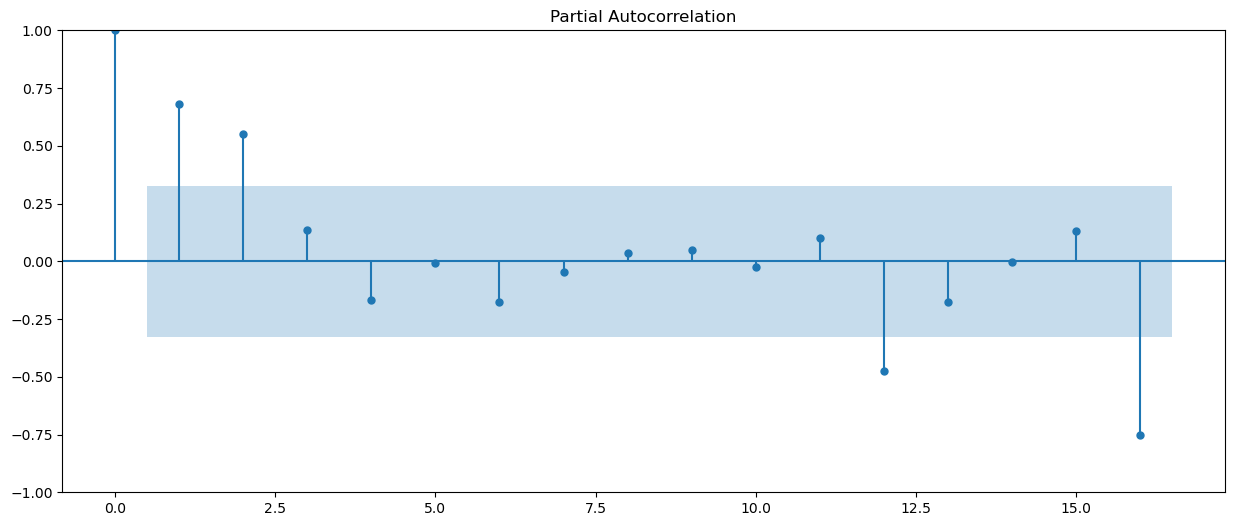

In [29]:
# Q -3, p - 2, d - 0-2
plot_pacf(shampoo)

In [30]:
#Importing the ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [31]:
#Creating the train - test dataset
shampoo_train = shampoo[0:25] #0 to 24 (first 24 values)
shampoo_test = shampoo[25:36] #25 to 35

In [32]:
shampoo_model = ARIMA(shampoo_train, order = (3, 1, 2))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
#Fitting the model
shampoo_model_fit = shampoo_model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
#The forecast - to see how good the model is 
shampoo_model_fit.aic

273.0692396089918

In [35]:
#Testing the model
shampoo_forecast = shampoo_model_fit.forecast(steps = 11)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [36]:
#Taking the square root of the mean square error
np.sqrt(mean_squared_error(shampoo_test, shampoo_forecast))

177.72790570286634

The result shows that the base line model is better than the ARIMA model when it come to prediction.

In [37]:
#Tuning the parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)

In [38]:
#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Creating a for loop
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            train, test = shampoo[0:25], shampoo[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp = 0)
                    pred_y = model_fit.forecast()
                    error = mean_squared_error(test, predictions)
                    print('ARIMA%s MSE = %.2f'% (order, error))
                except:
                    continue